In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [2]:
soil_data=pd.read_csv('/workspaces/Irrigation-prediction-using-Machine-Learning/data.csv') #The csv file path should be either uploaded in the notebook or select from the 
                                   #directory where the file is located if the notebook is installed in your computer.
soil_data.head()


,crop,moisture,temp,pump
0,cotton,638,16,1
1,cotton,522,18,1
2,cotton,741,22,1
3,cotton,798,32,1
4,cotton,690,28,1


In [3]:
soil_data.rename(columns = {'moisture':'Moisture'}, inplace = True)
soil_data.rename(columns = {'temp':'Temperature'}, inplace = True)
soil_data.rename(columns = {'pump':'Sprinkle'}, inplace = True)
print( 'Tax(n_lines,n_columns)of data frame :',soil_data.shape)
soil_data.head(16)

Tax(n_lines,n_columns)of data frame : (200, 4)


,crop,Moisture,Temperature,Sprinkle
0,cotton,638,16,1
1,cotton,522,18,1
2,cotton,741,22,1
3,cotton,798,32,1
4,cotton,690,28,1
5,cotton,558,23,1
6,cotton,578,12,1
7,cotton,673,35,1
8,cotton,642,45,1
9,cotton,723,11,1


In [4]:
soil_data.describe()

,Moisture,Temperature,Sprinkle
count,200.000000,200.000000,200.000000
mean,633.085000,27.750000,0.750000
std,279.077118,10.869602,0.434099
min,4.000000,10.000000,0.000000
25%,500.500000,18.000000,0.750000
50%,693.500000,28.000000,1.000000
75%,850.750000,38.000000,1.000000
max,1022.000000,45.000000,1.000000


In [5]:
soil_data['Sprinkle'].value_counts()

1    150
0     50
Name: Sprinkle, dtype: int64

Text(0.5, 1.0, 'Distribution of 1 Sprinkle')

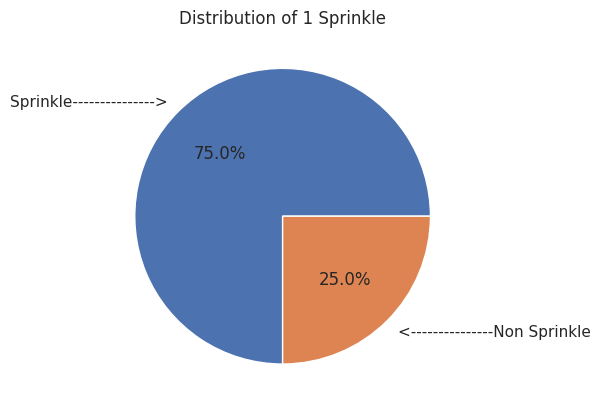

In [6]:
labels=["Sprinkle--------------->","<---------------Non Sprinkle"]
y=np.array([150, 50])
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.title('Distribution of 1 Sprinkle')

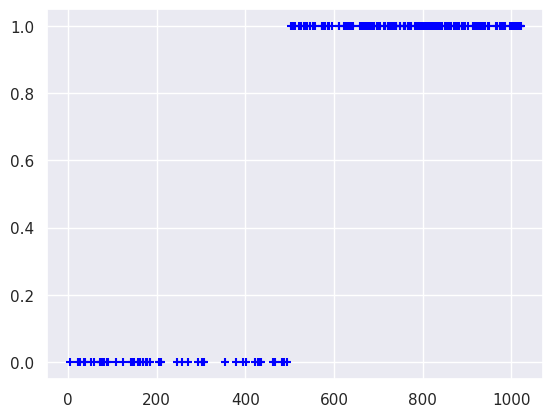

In [7]:
plt.scatter(soil_data.Moisture,soil_data.Sprinkle,marker='+',color='blue')

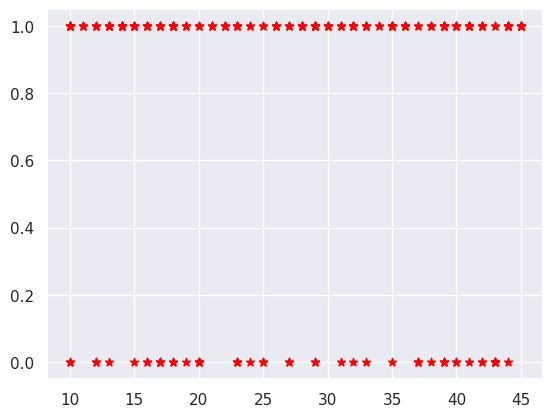

In [8]:
plt.scatter(soil_data.Temperature,soil_data.Sprinkle,marker='*',color='red')

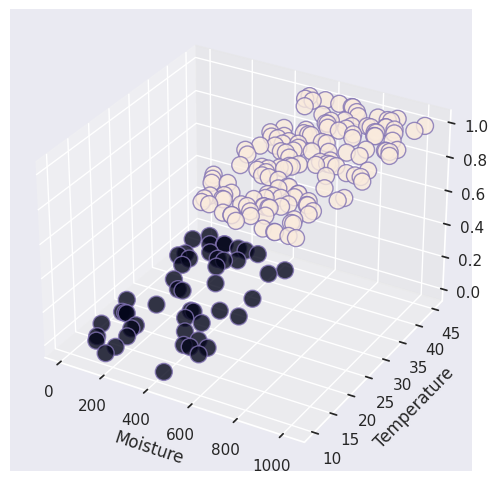

In [9]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(soil_data.Moisture, soil_data.Temperature, soil_data.Sprinkle,
           linewidths=1, alpha=.8,
           edgecolor='m',
           s = 150,
           c=soil_data.Sprinkle)
plt.xlabel("Moisture")
plt.ylabel("Temperature")

plt.show()

/tmp/ipykernel_9668/2632001755.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = soil_data.corr()


<AxesSubplot: >

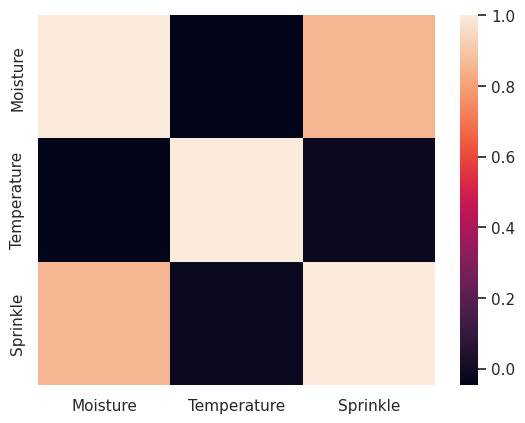

In [10]:
cormat = soil_data.corr()
round(cormat,3)
sns.heatmap(cormat)

In [11]:
from sklearn.model_selection import train_test_split 
X = soil_data.drop(['Sprinkle','crop'], axis=1)
y = soil_data['Sprinkle']
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.2,stratify=y, random_state=42)

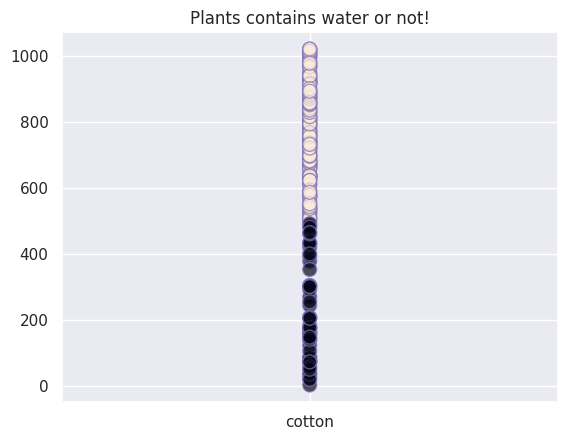

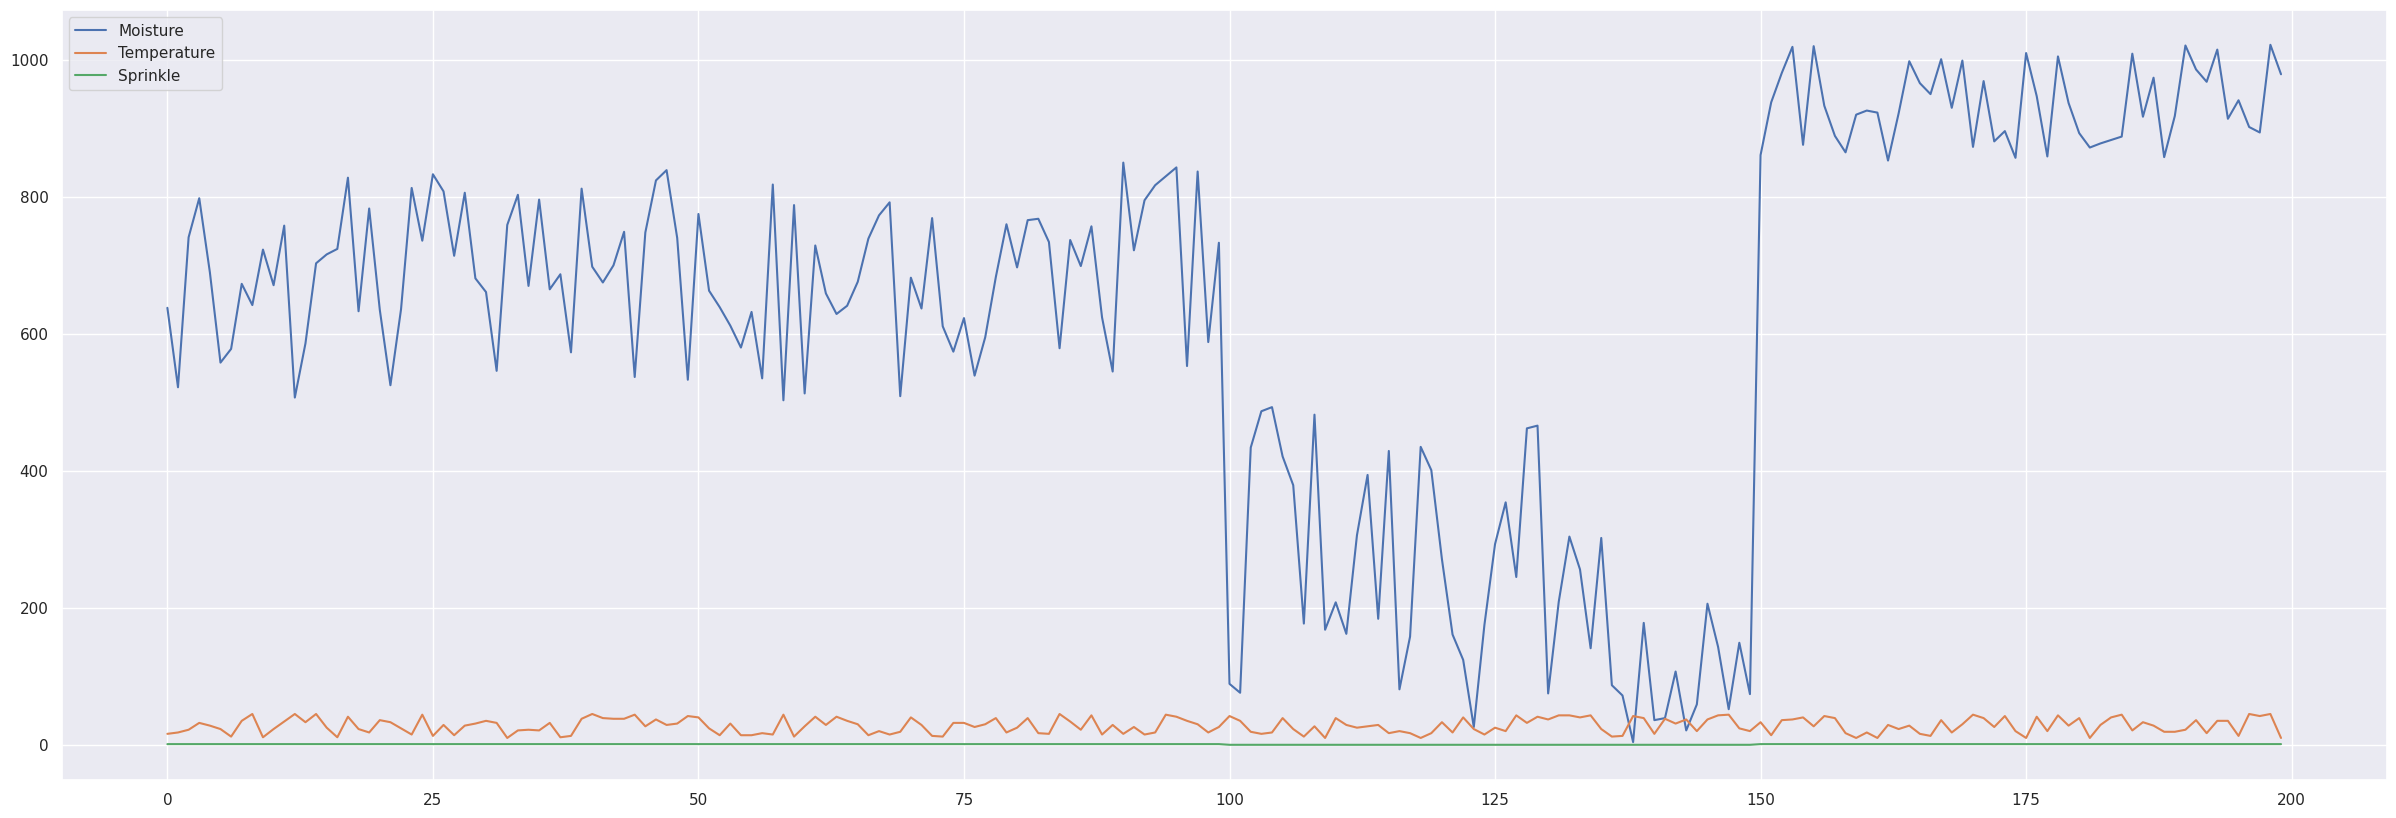

In [12]:
X, y, scale = np.random.randn(3, 100)
fig, ax = plt.subplots()

# Map each onto a scatterplot we'll create with Matplotlib
ax.scatter(soil_data.crop, soil_data.Moisture, 
           c=soil_data.Sprinkle, edgecolor='m',alpha=.7,s=100)
ax.plot(figsize=(20,10))
soil_data.plot(figsize=(30,10))
ax.set(title="Plants contains water or not!")
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob=model.predict_proba(X_test)

In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

0.95 : is the accuracy score
0.9375 : is the precision score
1.0 : is the recall score
0.967741935483871 : is the f1 score


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[30  0]
 [ 2  8]]


Confusion matrix, without normalization
[[30  0]
 [ 2  8]]


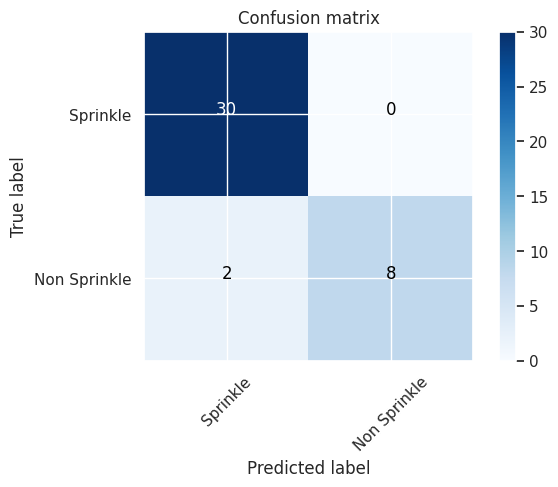

In [16]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Sprinkle','Non Sprinkle'],normalize= False,  title='Confusion matrix')

In [17]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.94      1.00      0.97        30

    accuracy                           0.95        40
   macro avg       0.97      0.90      0.93        40
weighted avg       0.95      0.95      0.95        40

